In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df=pd.read_csv('medical_examination.csv')

In [5]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [6]:
df['overweight'] = np.where(df['weight'] / (df['height']/100)**2 > 25, 1, 0)

In [7]:
df['cholesterol']=np.where(df['cholesterol']>1,1,0)
df['gluc']=np.where(df['gluc']>1,1,0)

In [8]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


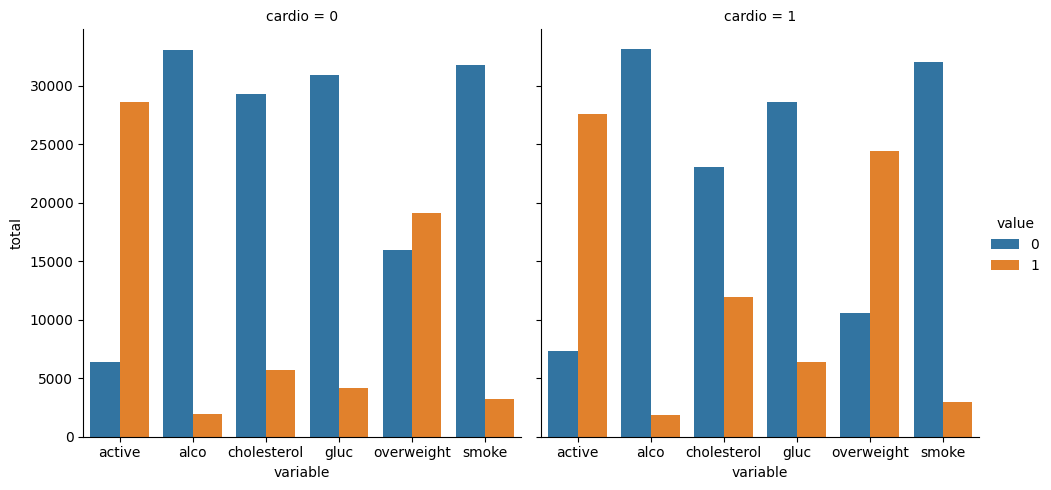

In [5]:
df_cat=pd.melt(df,id_vars=['cardio'],value_vars=['cholesterol','gluc','smoke','alco','active','overweight'])
df_cat['total']=1
df_cat=df_cat.groupby(['cardio','variable','value'],as_index=False).count()
sns.catplot(x='variable',y='total',hue='value',col='cardio',data=df_cat,kind='bar')
plt.show()

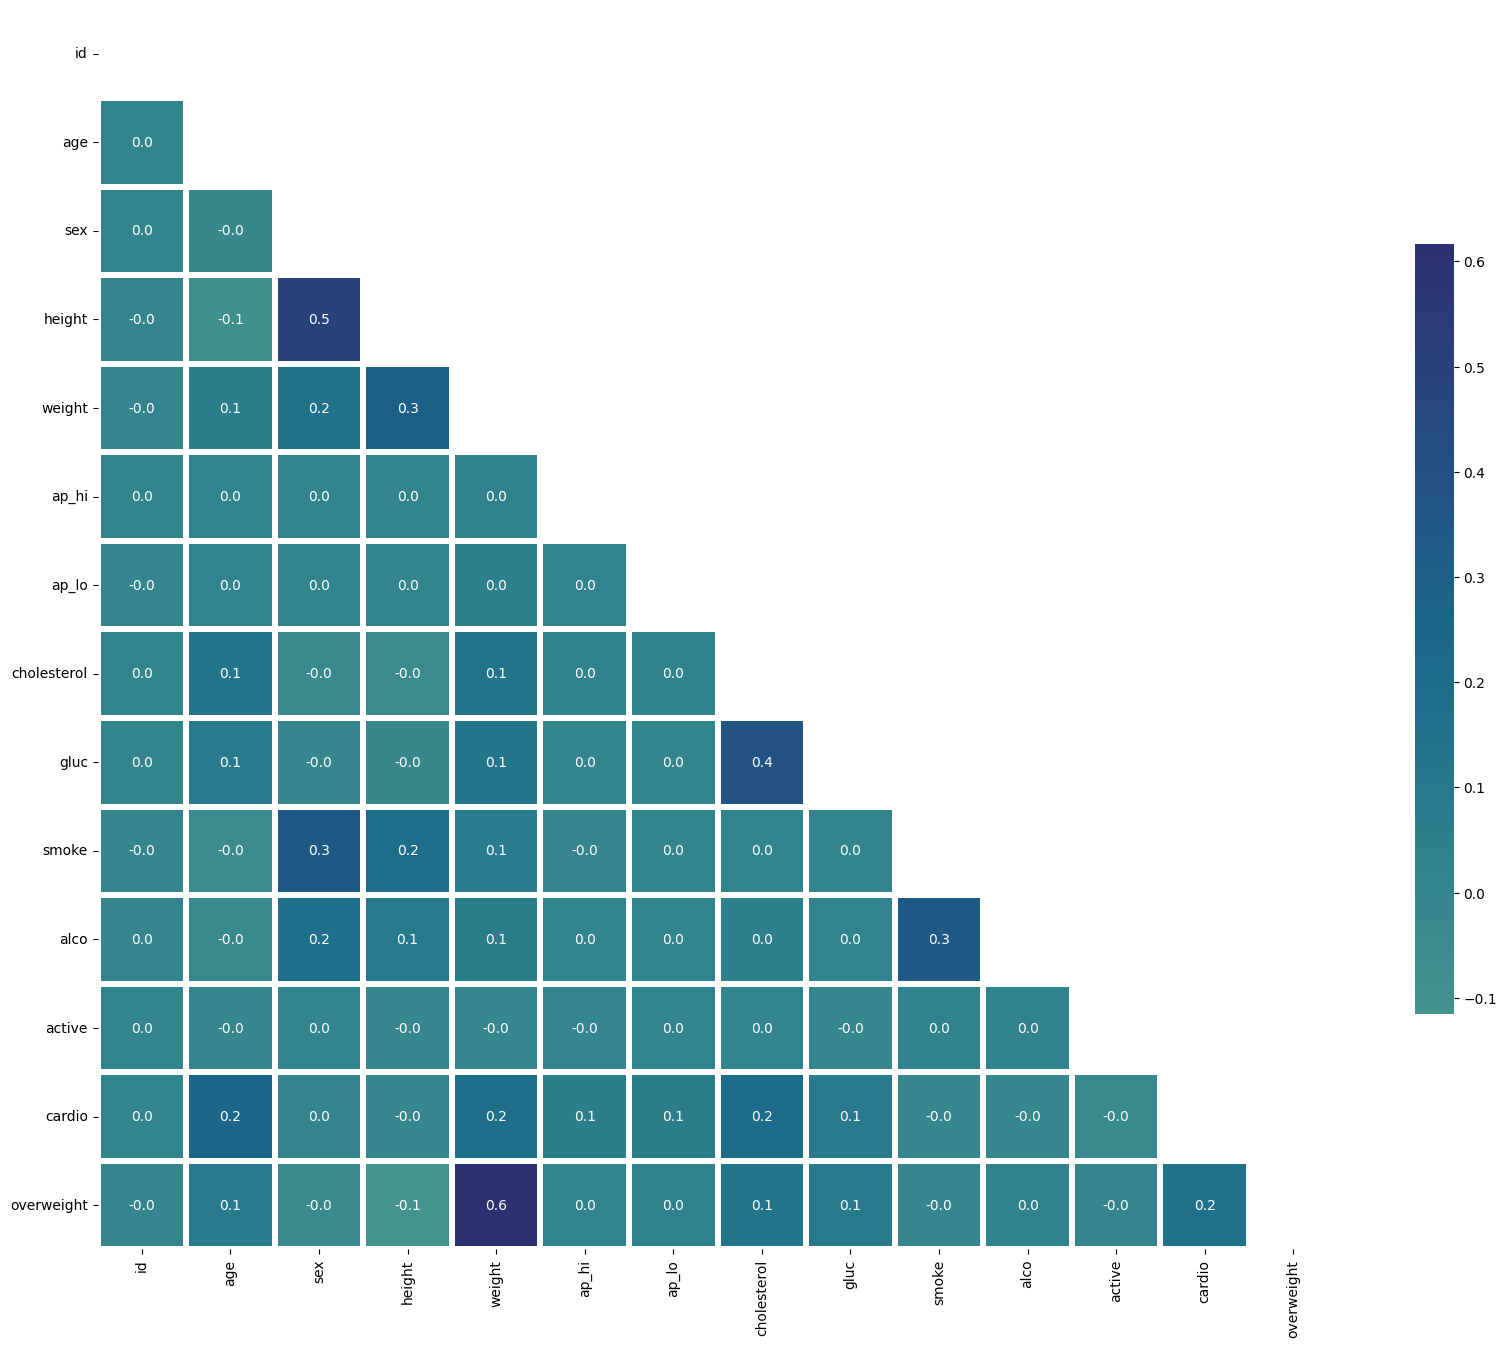

In [9]:
import seaborn as sns
df_heat= df[
    (df['ap_lo'] <= df['ap_hi']) &
    (df['height'] >= df['height'].quantile(0.025)) &
    (df['height'] <= df['height'].quantile(0.975)) &
    (df['weight'] >= df['weight'].quantile(0.025)) &
    (df['weight'] <= df['weight'].quantile(0.975))
]
df_heat=df_heat.reindex(columns=['id','age','sex','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','cardio','overweight'])
corr=df.corr()
mask=np.triu(corr)
fig=plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,mask=mask,fmt='.1f',square=True,cbar_kws={'shrink':0.5},linewidths=3,cmap='crest',center=0,)
plt.yticks(rotation='horizontal')
plt.xticks(rotation='vertical')         # this changes our x-axis tick labels to vertical
plt.show()
